In [2]:
import numpy as np
from PIL import Image
from pylab import *
from copy import deepcopy
%matplotlib inline
import cv2
import numpy as np
from PIL import Image
from pylab import *
%matplotlib inline
from PIL import Image
import numpy as num, math
import numpy as np 
from math import pi, sqrt, exp
from copy import deepcopy
import matplotlib.pyplot as plt
from numpy import matrix
import matplotlib.cm as cm




**Original Image**

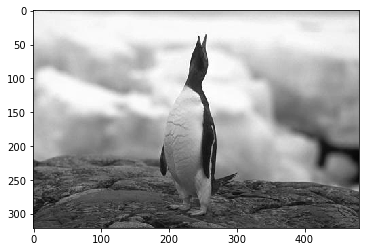

In [3]:
I = array(Image.open('/home/srikar/CVV/penguin.jpg'))
imshow(I,cmap = cm.gray)

In [4]:
def Gaussian_Fn(n,sigma):
    size = range(-int(n/2),int(n/2)+1)
    return [1 / (sigma * sqrt(2*pi)) * exp(-float(x)**2/(2*sigma**2)) for x in size]

    

In [5]:
def Gaussian_Derrivative(n,sigma):
    size = range(-int(n/2),int(n/2)+1)
    return [-x / (sigma**3*sqrt(2*pi)) * exp(-float(x)**2/(2*sigma**2)) for x in size]


In [6]:
Gaussian_Fn(11,1)

[1.4867195147342977e-06,
 0.00013383022576488537,
 0.0044318484119380075,
 0.05399096651318806,
 0.24197072451914337,
 0.3989422804014327,
 0.24197072451914337,
 0.05399096651318806,
 0.0044318484119380075,
 0.00013383022576488537,
 1.4867195147342977e-06]

In [7]:
Gaussian_Derrivative(11,1)

[7.4335975736714894e-06,
 0.0005353209030595415,
 0.013295545235814022,
 0.10798193302637613,
 0.24197072451914337,
 0.0,
 -0.24197072451914337,
 -0.10798193302637613,
 -0.013295545235814022,
 -0.0005353209030595415,
 -7.4335975736714894e-06]

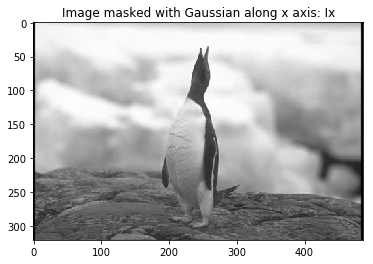

In [10]:
Ixg=[]
g = Gaussian_Fn(7,0.5)
for i in range(len(I[:,0])):
    x=np.convolve(I[i,:], g)
    Ixg.append(x)
    
Ixg =np.array(np.matrix(Ixg))

plt.title('Image masked with Gaussian along x axis: Ix')
plt.imshow(Ixg,cmap = cm.gray)


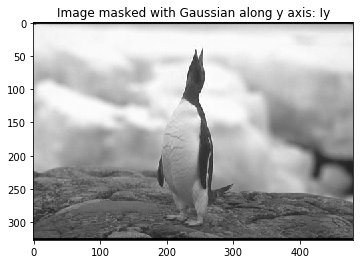

In [11]:
Iyt =[]
for i in range (len(I[0,:])):
    y = np.convolve(I[:,i], g)
    Iyt.append(y) 
Iyg = np.transpose(Iyt)

plt.title('Image masked with Gaussian along y axis: Iy')
plt.imshow(Iyg,cmap = cm.gray)

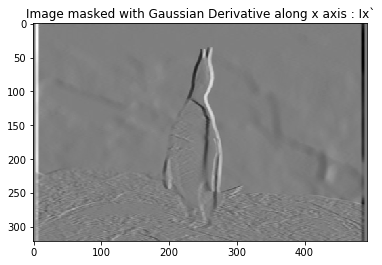

In [12]:
gd = Gaussian_Derrivative(7,8)
Ix_gd = []
for i in range(len(Ixg[:,0])):
    x = np.convolve(Ixg[i,:],gd)
    Ix_gd.append(x)
    
plt.title('Image masked with Gaussian Derivative along x axis : Ix`')
plt.imshow(Ix_gd,cmap = cm.gray)



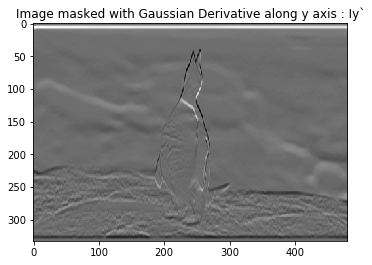

In [13]:
IygdT=[]
for i in range (len(Iyg[0,:])):
    y = np.convolve(Iyg[:,i], gd)
    IygdT.append(y) 
Iy_gd= np.transpose(IygdT)
plt.title('Image masked with Gaussian Derivative along y axis : Iy`')
plt.imshow(Iy_gd,cmap = cm.gray)



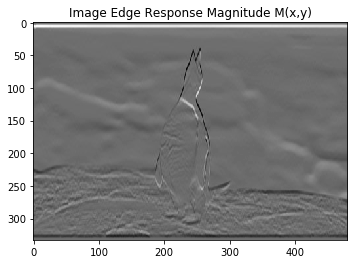

In [14]:
Ix_gdsq= np.square(Ix_gd)
Iy_gdsq= np.square(Iy_gd)

Magxy =[]
for i in  range (len(Ix_gdsq)):
    temp = []
    for j in range (len(Iy_gdsq[0,:])):
        temp.append(sqrt(Ix_gdsq[i,j] + Iy_gdsq[i,j]))
        if(j == len(Iy_gdsq[0,:])-1):
            Magxy.append(temp)
Magxy = np.array(np.matrix(Magxy))
plt.title('Image Edge Response Magnitude M(x,y)')
plt.imshow(Iy_gd,cmap = cm.gray)



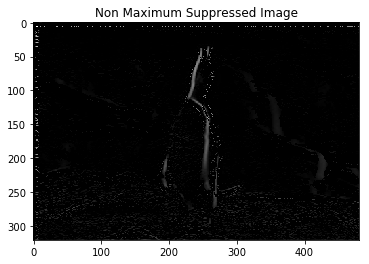

In [15]:
A= np.array(np.matrix(Ix_gd))
B= np.array(np.matrix(Iy_gd))
AngleDeg =[]
for i in range(len(Ix_gd)):
    temp=[]
    for j in range(len(Iy_gd[0,:])):
        temp.append((math.atan2(B[i,j],A[i,j]))*180/pi)
        if(j == len(Iy_gd[0,:])-1):
            AngleDeg.append(temp)
            
Angle= np.array(np.matrix(AngleDeg))
Magxy_Temp = Magxy 
NonMax  = deepcopy(Magxy)
for i in range(len(Angle[:,0])):
    for j in range(len(Angle[0,:])):
        try:
            #Horizontal Edge
            if ((-22.5< Angle[i,j] <= 22.5) | ( -157.5 < Angle[i,j] <= 157.5)):
                if((Magxy_Temp[i,j] < Magxy_Temp[i+1,j]) | (Magxy_Temp[i, j] < Magxy_Temp[i-1,j])):
                    NonMax[i,j] = 0
                    
                
            #Vertical Edge
            if ((-112.5 < Angle[i,j] <= -67.5) | ( 67.5 < Angle[i,j] <= 112.5)):
                if((Magxy_Temp[i,j] < Magxy_Temp[i,j+1]) | (Magxy_Temp[i, j] < Magxy_Temp[i,j-1])):
                    NonMax[i,j] = 0

                    
            #+45 Degree Edge
            
            if ((-67.5 < Angle[i,j] <= -22.5) | ( 112.5 < Angle[i,j] <= 157.5)):
                if((Magxy_Temp[i,j] < Magxy_Temp[i+1,j+1]) | (Magxy_Temp[i, j] < Magxy_Temp[i+1,j+1])):
                    NonMax[i,j] = 0
                    

            #-45 degree Edge
            
            if ((-157.5 < Angle[i,j] <= -112.5) | (22.5 < Angle[i,j] <= 67.5 )):
                if((Magxy_Temp[i,j] < Magxy_Temp[i-1,j-1]) | (Magxy_Temp[i, j] < Magxy_Temp[i+1,j+1])):
                    NonMax[i,j] = 0
                    
            

        except IndexError:
                pass
            
            
            
plt.title('Non Maximum Suppressed Image')
plt.imshow(NonMax,cmap = cm.gray)


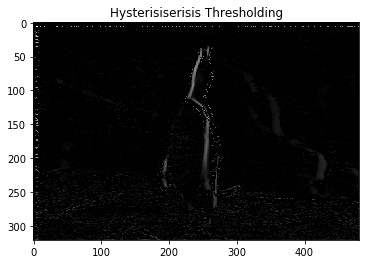

In [16]:
NonMax =(matrix(NonMax))
Hysterisis = deepcopy(NonMax)
u = v = 0
highT = 4.5 # The Non Maximum suppression matrix was checked for several points of 
lowT = 1.5  #thresholds to suppress the non edge points
maxm = 255 # we would be using this to set the pixel in order to make it a edge in the following for loops

for i in range(len(Hysterisis[:,0])-1):
    
    for j in range(len(Hysterisis[0,:])-1):
        
        u = i
        v = j
        while((u!=0)&(v!=0)):
            
            if (Hysterisis[u,v] >=highT):
                
                Hysterisis[u,v] = maxm
                try:
                    
                    if (lowT<=Hysterisis[u+1,v] < highT):
                        
                        Hysterisis[u+1,v] = maxm
                        u = u+1
                        v = v
                    elif (lowT<=Hysterisis[u-1,v]<highT):
                        
                        Hysterisis[u-1,v] = maxm
                        u = u-1
                        v= v
                    elif (lowT<=Hysterisis[u+1,v+1]<highT):
                        
                                Hysterisis[u+1,y+1] = maxm
                                u = u+1
                                v = v+1
                    elif (lowT<=Hysterisis[u-1,v-1]<highT):
                                                
                        Hysterisis[u-1,v-1] = maxm
                        u = u-1
                        v = v-1
                    elif (lowT<=Hysterisis[u,v+1]<highT):
                                                                       
                        Hysterisis[u,v+1] = maxm
                        u = u
                        v = v+1

                    elif (lowT<=Hysterisis[u,v-1]<highT):
                        
                        Hysterisis[u,v-1] = maxm
                        u = u
                        v = v-1
                    elif (lowT<=Hysterisis[u-1,v+1]<highT):
                        
                        Hysterisis[u-1,v+1] = maxm
                        u = u-1
                        v = v+1
                    elif (lowT<=Hysterisis[u+1,v-1]<highT):
                        
                        Hysterisis[u+1,v-1] = maxm
                        u = u+1
                        v = v-1
                    else: 
                        
                        u = 0
                        v = 0


                except IndexError: 
                    
                    u = 0
                    v = 0

            elif (lowT<= Hysterisis[u,v]<highT):
                
                Hysterisis[u,v] = maxm

            else:
                Hysterisis[u,v] = 0
                u = 0
                v = 0 
                
plt.title('Hysterisiserisis Thresholding')
plt.imshow(Hysterisis,cmap = cm.gray)


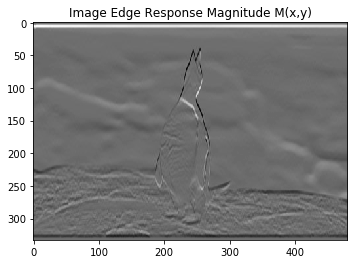

In [17]:
plt.title('Image Edge Response Magnitude M(x,y)')
plt.imshow(Iy_gd,cmap = cm.gray)


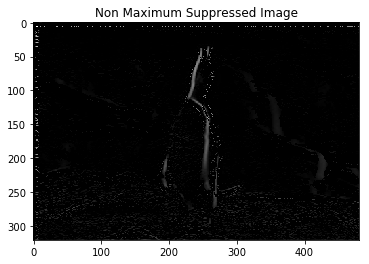

In [18]:
            
plt.title('Non Maximum Suppressed Image')
plt.imshow(NonMax,cmap = cm.gray)